In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as k

In [22]:
k.clear_session()
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
__________

In [25]:
train_gen=ImageDataGenerator(rescale=1./255,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rotation_range=10,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

test_gen=ImageDataGenerator(rescale=1./255)

In [27]:
train=train_gen.flow_from_directory('data/train',
                                    target_size=(64,64),
                                    batch_size=16,
                                    class_mode='binary')

test=test_gen.flow_from_directory('data/test',
                                 target_size=(64,64),
                                 batch_size=16,
                                 class_mode='binary')

Found 11663 images belonging to 2 classes.
Found 2920 images belonging to 2 classes.


In [29]:
model.fit_generator(train,
                   epochs=25,
                   steps_per_epoch=800,
                   validation_data=test,
                   validation_steps=200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
800/800 [==============================] - 826s 1s/step - loss: 0.6062 - acc: 0.6814 - val_loss: 0.5163 - val_acc: 0.7375
Epoch 2/25
800/800 [==============================] - 720s 900ms/step - loss: 0.5056 - acc: 0.7439 - val_loss: 0.5912 - val_acc: 0.6789
Epoch 3/25
800/800 [==============================] - 587s 733ms/step - loss: 0.4608 - acc: 0.7761 - val_loss: 0.4288 - val_acc: 0.7898
Epoch 4/25
800/800 [==============================] - 465s 581ms/step - loss: 0.4405 - acc: 0.7857 - val_loss: 0.4496 - val_acc: 0.7669
Epoch 5/25
800/800 [==============================] - 466s 582ms/step - loss: 0.4078 - acc: 0.8059 - val_loss: 0.4202 - val_acc: 0.7829
Epoch 6/25
800/800 [==============================] - 465s 582ms/step - loss: 0.3938 - acc: 0.8114 - val_loss: 0.4115 - val_acc: 0.8164
Epoch 7/25
800/800 [==============================] - 469s 587ms/step - loss: 0.3744 - acc: 0.8262 - val_loss: 0.3707 - val_acc: 0.8221
Epo

In [32]:
from itertools import islice
X_test = []
y_test = []
for ts in islice(test, 50):
    X_test.append(ts[0])
    y_test.append(ts[1])

X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

In [35]:
X_test[0]

array([[[0.74509805, 0.6745098 , 0.61960787],
        [0.70980394, 0.6313726 , 0.5882353 ],
        [0.7490196 , 0.6627451 , 0.61960787],
        ...,
        [0.27058825, 0.2784314 , 0.22352943],
        [0.29411766, 0.3019608 , 0.24705884],
        [0.28627452, 0.29411766, 0.2392157 ]],

       [[0.61960787, 0.6       , 0.5764706 ],
        [0.74509805, 0.67058825, 0.654902  ],
        [0.7843138 , 0.65882355, 0.6627451 ],
        ...,
        [0.2901961 , 0.29803923, 0.24313727],
        [0.28627452, 0.29411766, 0.2392157 ],
        [0.32941177, 0.3372549 , 0.28235295]],

       [[0.7843138 , 0.7686275 , 0.7568628 ],
        [0.69411767, 0.62352943, 0.6156863 ],
        [0.7960785 , 0.6745098 , 0.6666667 ],
        ...,
        [0.30588236, 0.3137255 , 0.25882354],
        [0.28235295, 0.2901961 , 0.23529413],
        [0.31764707, 0.3254902 , 0.27058825]],

       ...,

       [[0.454902  , 0.37647063, 0.33333334],
        [0.20000002, 0.20000002, 0.15294118],
        [0.37647063, 0

In [39]:
y_test[0]

1.0

In [40]:
y_pred=model.predict_classes(X_test).ravel()

In [41]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,

In [42]:
y_test

array([1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0.

In [56]:
wrong_predicted=np.argwhere(y_test != y_pred).ravel()

In [57]:
wrong_predicted

array([ 13,  17,  22,  31,  34,  39,  49,  68,  70,  71,  74,  77,  79,
        82, 114, 123, 125, 133, 135, 138, 145, 182, 208, 216, 219, 229,
       262, 299, 304, 308, 309, 329, 339, 340, 346, 353, 360, 365, 369,
       375, 380, 390, 398, 405, 406, 407, 426, 427, 428, 433, 435, 437,
       446, 447, 457, 458, 470, 489, 500, 505, 510, 521, 523, 524, 527,
       531, 534, 551, 561, 562, 564, 582, 587, 593, 615, 620, 633, 636,
       638, 639, 648, 653, 656, 657, 666, 668, 676, 677, 693, 696, 712,
       726, 731, 732, 749, 753, 769, 783, 793, 794, 797], dtype=int64)

In [61]:
print(len(y_pred))
print(len(wrong_predicted))

800
101


In [63]:
print("test accuracy is : {0}".format((699/800)*100))

test accuracy is : 87.375


** Female **


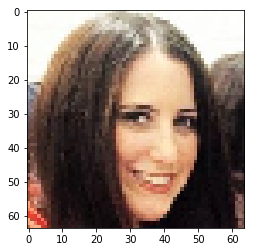

In [67]:
plt.imshow(X_test[56])
if y_pred[56]==0:
    print('** Female **')
else:
    print('** male **')

** Male **


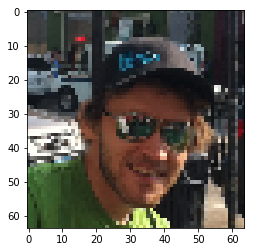

In [68]:
plt.imshow(X_test[23])
if y_pred[23]==0:
    print('** Female **')
else:
    print('** Male **')